In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator #import the Image data genrator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf #importing the tensor flow library
import numpy as np #import the numpy library
import matplotlib.pyplot as plt# import the matplotlib library
import cv2 #import the opencv library 
import os
import PIL.Image
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scikeras.wrappers import KerasClassifier

In [8]:
img = image.load_img("../data/b26.jpg")

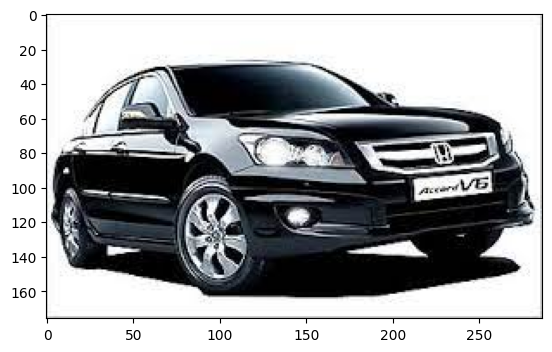

In [9]:
 plt.imshow(img)

In [10]:
cv2.imread("../data/b26.jpg").shape

(176, 287, 3)

In [12]:
train = ImageDataGenerator(rescale =1/255)
validation = ImageDataGenerator(rescale =1/255)
test = ImageDataGenerator(rescale =1/255)

In [13]:
train_dataset = train.flow_from_directory("../data/train" , 
                                          target_size= (180, 270),
                                         batch_size= 16,
                                         class_mode = 'categorical')
validation_dataset = train.flow_from_directory("../data/validation" , 
                                          target_size= (180, 270),
                                         batch_size= 16,
                                         class_mode = 'categorical',shuffle=False)

test_dataset = train.flow_from_directory("../data/test" , 
                                          target_size= (180, 270),
                                         batch_size= 16,
                                         class_mode = 'categorical',shuffle=False)


Found 1050 images belonging to 4 classes.
Found 119 images belonging to 4 classes.
Found 119 images belonging to 4 classes.


In [14]:
classes = train_dataset.class_indices
classes


{'black': 0, 'blue': 1, 'red': 2, 'white': 3}

In [15]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3])

In [20]:

model  = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu',input_shape=(180, 270, 3)),
                                tf.keras.layers.MaxPool2D((2,2)),

                                tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                tf.keras.layers.MaxPool2D(2,2),

                                tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                tf.keras.layers.MaxPool2D(2,2), 

                               # tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
                               # tf.keras.layers.MaxPool2D(2,2),
                               # BatchNormalization(),

                                tf.keras.layers.Flatten(),

                                tf.keras.layers.Dense(512,activation = 'relu'),

                                tf.keras.layers.Dense(4,activation = 'softmax')

                                ])

model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(0.001),
              metrics = ['accuracy'])
model.save('vehical_color.keras')


In [21]:
callbacks_list = [
                    keras.callbacks.ModelCheckpoint(filepath='vehical_color.keras',monitor='val_loss', save_best_only=True, verbose=1),
                                                    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
                 ]

In [22]:
model_fit = model.fit(train_dataset,steps_per_epoch =6,epochs=50, validation_data = validation_dataset,callbacks=callbacks_list  )

Epoch 1/50


C:\Users\Shripad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.2300 - loss: 6.4007
Epoch 1: val_loss improved from inf to 1.30899, saving model to vehical_color.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 960ms/step - accuracy: 0.2359 - loss: 6.2097 - val_accuracy: 0.3529 - val_loss: 1.3090
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.3087 - loss: 1.3087
Epoch 2: val_loss improved from 1.30899 to 1.15202, saving model to vehical_color.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 650ms/step - accuracy: 0.3092 - loss: 1.3049 - val_accuracy: 0.4286 - val_loss: 1.1520
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.5172 - loss: 1.1255
Epoch 3: val_loss did not improve from 1.15202
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 329ms/step - accuracy: 0.5132 - loss: 1.1263 - val_accuracy: 0.2521 - val_loss: 1.3825
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.4778 - loss: 1.1642
Epoch 4: val_loss improved from 1.15202 to 0.75535, saving model to vehical_color.keras
6/6 ━━━━━━━━━━━━━━━━━━━

C:\Users\Shripad\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 12: val_loss did not improve from 0.23140
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9328 - val_loss: 0.2314
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.8550 - loss: 0.3234
Epoch 13: val_loss did not improve from 0.23140
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step - accuracy: 0.8487 - loss: 0.3288 - val_accuracy: 0.8992 - val_loss: 0.2812
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.9023 - loss: 0.2823
Epoch 14: val_loss did not improve from 0.23140
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.8999 - loss: 0.2842 - val_accuracy: 0.9160 - val_loss: 0.2461
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8247 - loss: 0.3615
Epoch 15: val_loss improved from 0.23140 to 0.15259, saving model to vehical_color.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 526ms/step - accuracy: 0.8333 - loss: 0.3545 - val_accuracy: 0.9496 - val_loss: 0.1526
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 220m

In [24]:
model.save('vehical_color.keras')

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 178, 268, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 134, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 132, 32)         │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 66, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 40960)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      20,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,995,338 (160.20 MB)

 Trainable params: 20,997,668 (80.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,997,670 (80.10 MB)

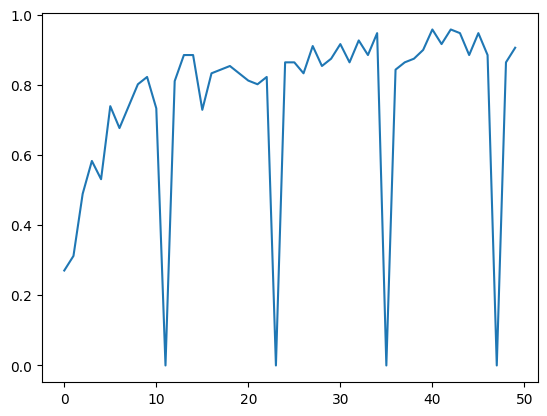

In [26]:
plt.plot(model_fit.history['accuracy'])
plt.show()

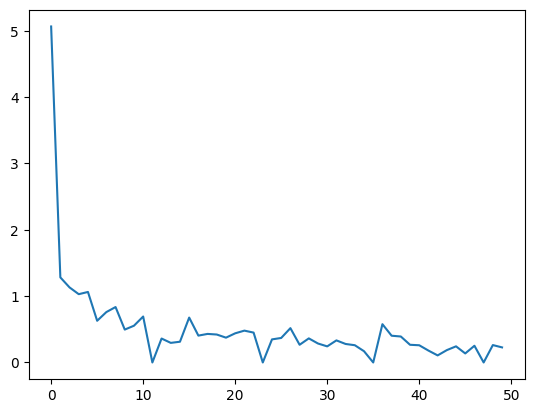

In [27]:
plt.plot(model_fit.history['loss'])
plt.show()

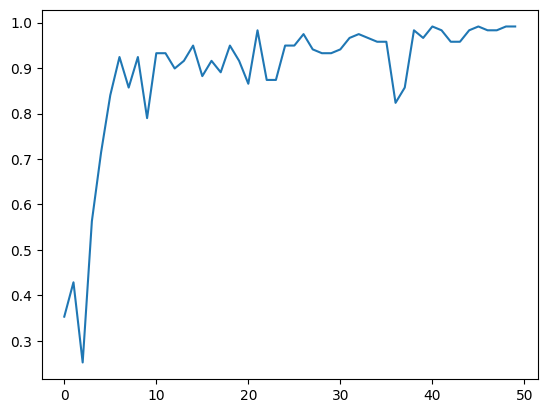

In [28]:
plt.plot(model_fit.history['val_accuracy'])
plt.show()

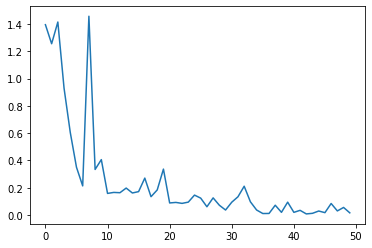

In [18]:
plt.plot(model_fit.history['val_loss'])
plt.show()

In [30]:
from tensorflow.keras.models import load_model
model = load_model('vehical_color.keras')
score = model.evaluate(train_dataset)
print('Val loss:', score[0])
print('val accuracy:', score[1])

66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9663 - loss: 0.1509
Val loss: 0.15570558607578278
val accuracy: 0.9609524011611938


In [31]:
score = model.evaluate(test_dataset)
print('loss:', score[0])
print('accuracy:', score[1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9929 - loss: 0.0517
loss: 0.04465807229280472
accuracy: 0.9915966391563416


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Classification Report
              precision    recall  f1-score   support

       black       0.97      1.00      0.98        30
        blue       1.00      0.97      0.98        30
         red       1.00      1.00      1.00        29
       white       1.00      1.00      1.00        30

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



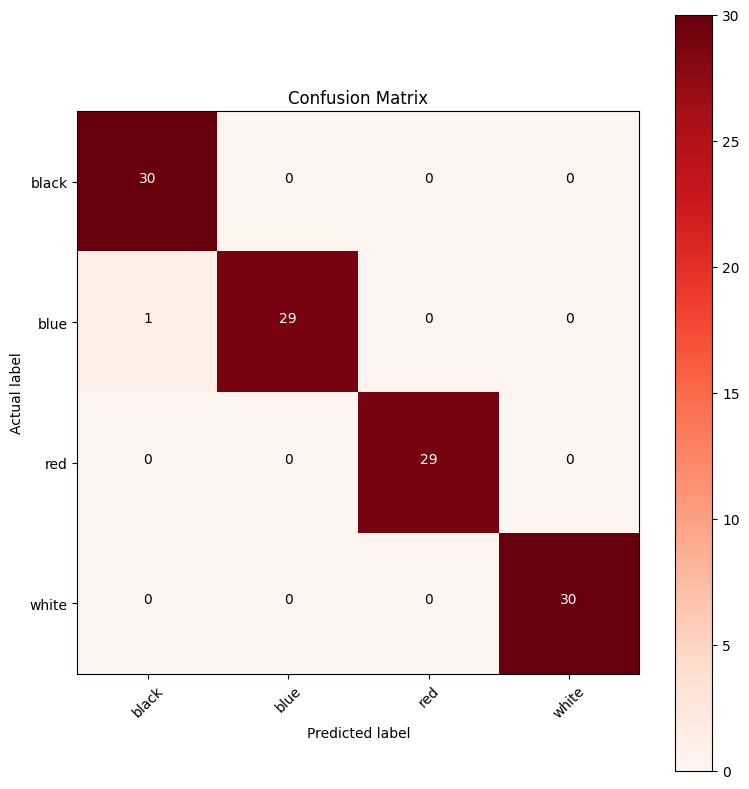

In [33]:
Y_pred = model.predict(test_dataset)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

cm = confusion_matrix(test_dataset.classes, y_pred)
cmap=plt.cm.Reds
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

print('Classification Report')
print(classification_report(test_dataset.classes, y_pred, target_names=target_names))